# Reading and manipulating IPC historical data 

Let's first import some useful packages like pandas, matplotlib and statsmodels 

In [2]:
import pandas as pd
from pandas import Series
from pandas.plotting import lag_plot
import numpy as np
import matplotlib.pyplot as plt
import re
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from AR_model_selection import get_order

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Reading the data as dataframe using pandas 

In [3]:
# reading the historical data
df = pd.read_csv('IPC.csv')

We are interested in the price and the percentage change columns. To do that, we need to make some data manipulation. 

In [4]:
# select the price/change % columns 
price_list = []
change_list = []
for i in range(len(df['Price'])):
    price_list.append(float(df['Price'][i].replace(",", "")))
    change_list.append(float(df['Change %'][i][0:-1]))
    
# replace the price/change colums with corresponding lists
df['Price'] = price_list     
df['Change %'] = change_list 


Plot the two selected timeseries with respect to time

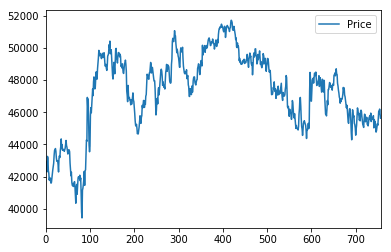

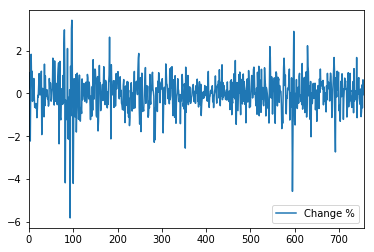

In [5]:
# plot prices with dates 
df.plot(y='Price')
df.plot(y='Change %') 

From the curves, we can expect the Price timeseries not to be stationary and that the percentage change is more
stable and so it is expected to be stationary. This is not a rigorous analysis though, some statistical tests can
be performed to have more evidence on stationarity of timeseries. 

Let's also plot the histograms 

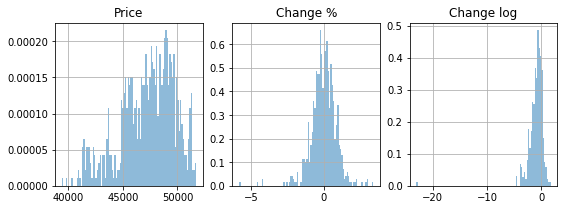

In [25]:
# histograms 
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)
plt.figure(figsize=(9, 3))
plt.subplot(131)
df['Price'].hist(**kwargs)
plt.title('Price')
# plt.hist(df['Price'], **kwargs)
plt.subplot(132)
df['Change %'].hist(**kwargs)
plt.title('Change %')
plt.subplot(133)
# log change histogram 
plt.title('Change log')
df['Change %'].apply(lambda x: np.log(np.abs(x+0.0000000001))).hist(**kwargs)